<a href="https://colab.research.google.com/github/MariosAvraam/space-mission-analysis/blob/main/Space_Mission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Space Mission Analysis
This notebook aims to analyze the dataset of space missions since the beginning of the Space Race, exploring various aspects like mission status, launch frequency, and mission costs.


## Data Loading and Initial Exploration

In [1]:
!unzip "Space+Missions+(start).zip"

Archive:  Space+Missions+(start).zip
  inflating: mission_launches.csv    
  inflating: __MACOSX/._mission_launches.csv  
  inflating: Space_Missions_Analysis_(start).ipynb  
  inflating: __MACOSX/._Space_Missions_Analysis_(start).ipynb  


Load necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read in the Dataset

In [3]:
# Load the dataset
missions_df = pd.read_csv('mission_launches.csv')

In [4]:
missions_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

Check for missing values, data types, and basic statistics.

In [5]:
# Checking for missing values
missing_values = missions_df.isnull().sum()

# Checking data types of each column
data_types = missions_df.dtypes

# Basic statistics for numerical columns
numerical_stats = missions_df.describe()

missing_values, data_types, numerical_stats

(Unnamed: 0.1         0
 Unnamed: 0           0
 Organisation         0
 Location             0
 Date                 0
 Detail               0
 Rocket_Status        0
 Price             3360
 Mission_Status       0
 dtype: int64,
 Unnamed: 0.1       int64
 Unnamed: 0         int64
 Organisation      object
 Location          object
 Date              object
 Detail            object
 Rocket_Status     object
 Price             object
 Mission_Status    object
 dtype: object,
        Unnamed: 0.1   Unnamed: 0
 count   4324.000000  4324.000000
 mean    2161.500000  2161.500000
 std     1248.375611  1248.375611
 min        0.000000     0.000000
 25%     1080.750000  1080.750000
 50%     2161.500000  2161.500000
 75%     3242.250000  3242.250000
 max     4323.000000  4323.000000)

## Data Cleaning and Preprocessing


Before diving into the analysis, we need to preprocess and clean our data.

In [6]:
# Dropping the unnamed index columns
missions_df = missions_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

# Convert the 'Price' column to numeric, setting errors='coerce' to turn invalid parsing into NaN
missions_df['Price'] = pd.to_numeric(missions_df['Price'], errors='coerce')

# Convert the 'Date' column to datetime format
missions_df['Date'] = pd.to_datetime(missions_df['Date'], errors='coerce', utc=True)

missions_df.dtypes

Organisation                   object
Location                       object
Date              datetime64[ns, UTC]
Detail                         object
Rocket_Status                  object
Price                         float64
Mission_Status                 object
dtype: object

Handle missing values.

In [7]:
# Impute missing values in 'Price' with the median
missions_df['Price'].fillna(missions_df['Price'].median(), inplace=True)

missions_df['Price'].describe()

count    4324.000000
mean       76.879204
std        72.702577
min         5.300000
25%        62.000000
50%        62.000000
75%        62.000000
max       450.000000
Name: Price, dtype: float64

## Exploratory Data Analysis

Missions by Organisation


In [8]:
# Checking the number of missions by each organisation
missions_by_org = missions_df['Organisation'].value_counts()
missions_by_org

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


Visualize total number of missions by top 20 organisations

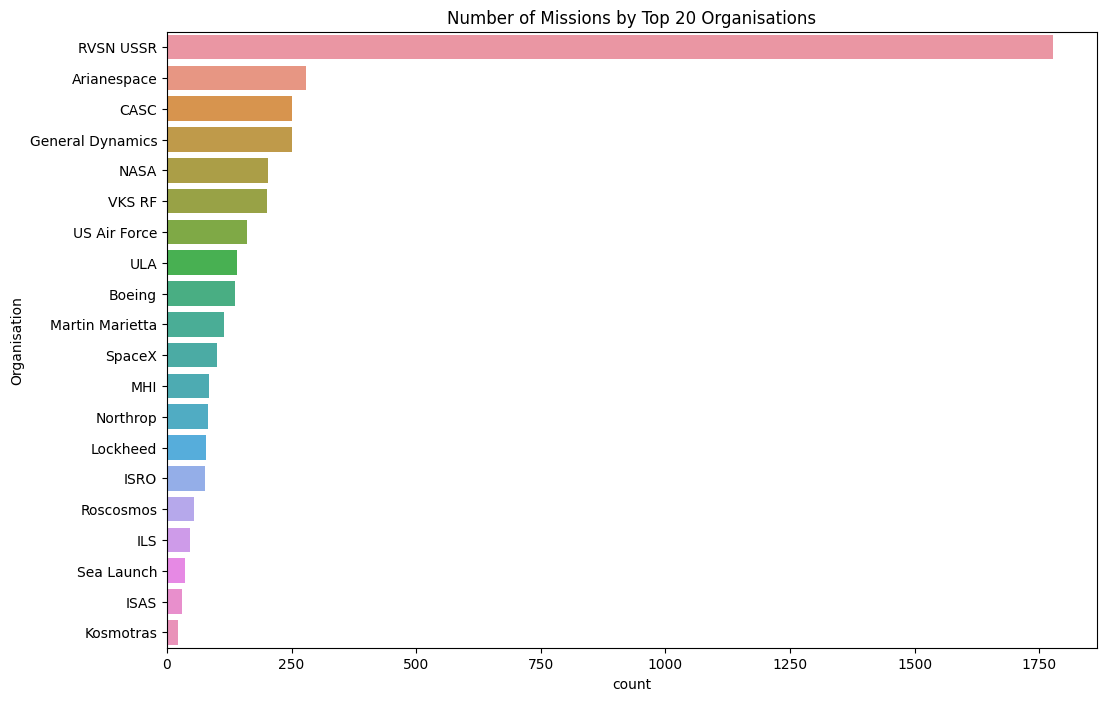

In [9]:
# Filter out top 20 organizations
top_orgs = missions_df['Organisation'].value_counts().head(20).index

filtered_df = missions_df[missions_df['Organisation'].isin(top_orgs)]

plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_df, y='Organisation', order=filtered_df['Organisation'].value_counts().index)
plt.title('Number of Missions by Top 20 Organisations')
plt.show()

Distribution of Mission Statuses


In [10]:
# Checking the distribution of mission statuses
mission_statuses = missions_df['Mission_Status'].value_counts()
mission_statuses

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

Visualize the distribution using a pie chart.



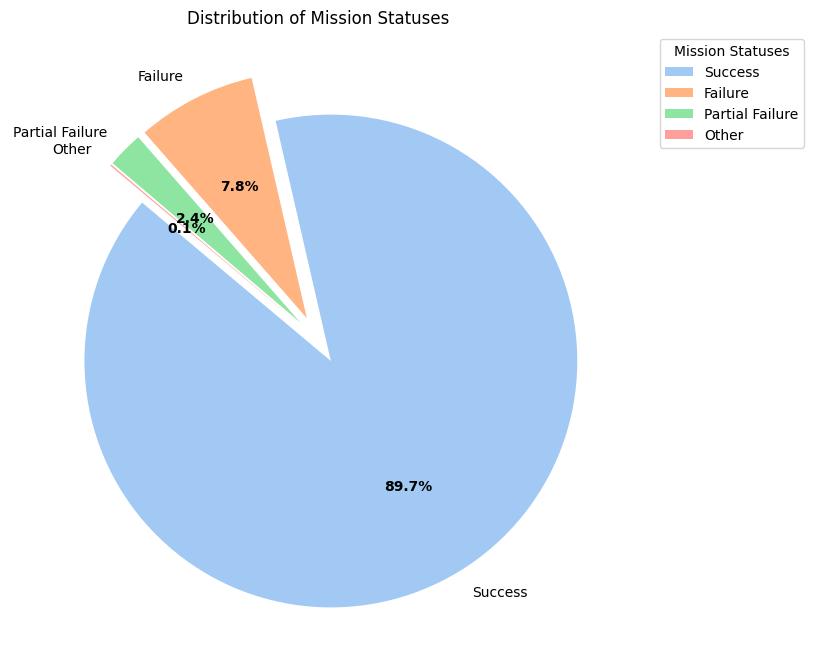

In [11]:
# Define threshold and categorize smaller categories into 'Other'
threshold = 0.02
series = missions_df['Mission_Status'].value_counts(normalize=True)
mask = series > threshold
tail = series.loc[~mask]
series = series.loc[mask]
if len(tail) > 0:
    series['Other'] = tail.sum()

# Plotting the pie chart with a legend
fig, ax = plt.subplots(figsize=(10, 8))
colors = sns.color_palette('pastel')[0:len(series)]
wedges, texts, autotexts = ax.pie(series, autopct='%1.1f%%', startangle=140, labels=series.index, explode=[0.1]*len(series), colors=colors)
ax.legend(wedges, series.index, title="Mission Statuses", loc="upper right", bbox_to_anchor=(1.3, 1))
plt.setp(autotexts, size=10, weight="bold")
ax.set_title('Distribution of Mission Statuses')
plt.show()


Missions Over Time


In [12]:
# Extracting year from the 'Date' column
missions_df['Year'] = missions_df['Date'].dt.year

# Grouping by year and organisation to count the number of launches
missions_by_year_org = missions_df.groupby(['Year', 'Organisation']).size().reset_index(name='Count')

# Finding the organisation with the most launches for each year
top_org_by_year = missions_by_year_org.loc[missions_by_year_org.groupby('Year')['Count'].idxmax()]
top_org_by_year.tail()


,Year,Organisation,Count
583,2016,CASC,22
611,2017,SpaceX,18
616,2018,CASC,37
632,2019,CASC,27
649,2020,CASC,19


Visualize the average cost of space missions over time.

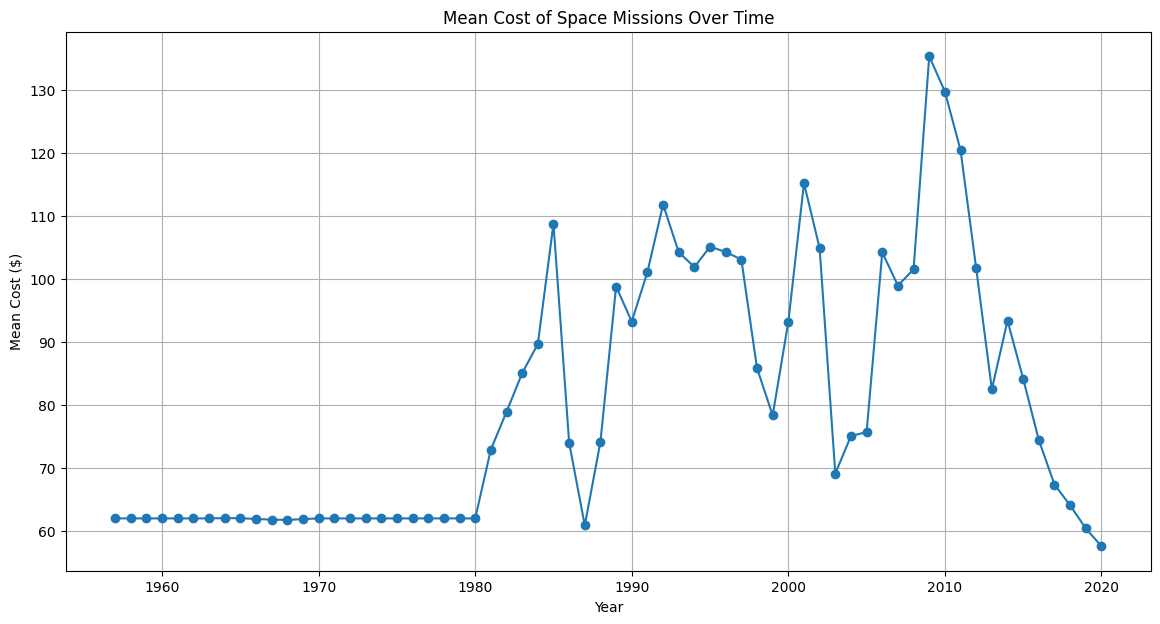

In [13]:
# Calculating the mean mission cost for each year
mean_price_by_year = missions_df.groupby('Year')['Price'].mean().reset_index()

# Visualize the trend
plt.figure(figsize=(14, 7))
plt.plot(mean_price_by_year['Year'], mean_price_by_year['Price'], marker='o', linestyle='-')
plt.title('Mean Cost of Space Missions Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Cost ($)')
plt.grid(True)
plt.show()


Visualize the number of launches for each month

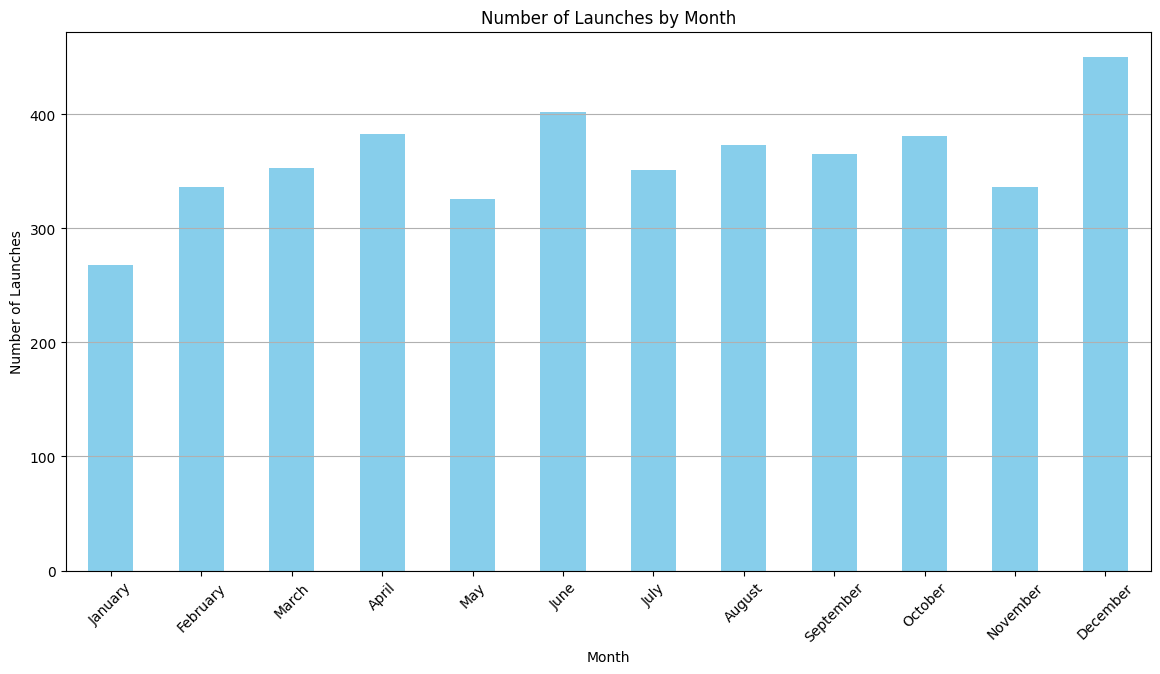

In [14]:
# Extracting month from the 'Date' column
missions_df['Month'] = missions_df['Date'].dt.month_name()

# Counting the number of launches for each month
launches_by_month = missions_df['Month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Visualizing the number of launches for each month
plt.figure(figsize=(14, 7))
launches_by_month.plot(kind='bar', color='skyblue')
plt.title('Number of Launches by Month')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Visualize the trend of mission success rates over the years

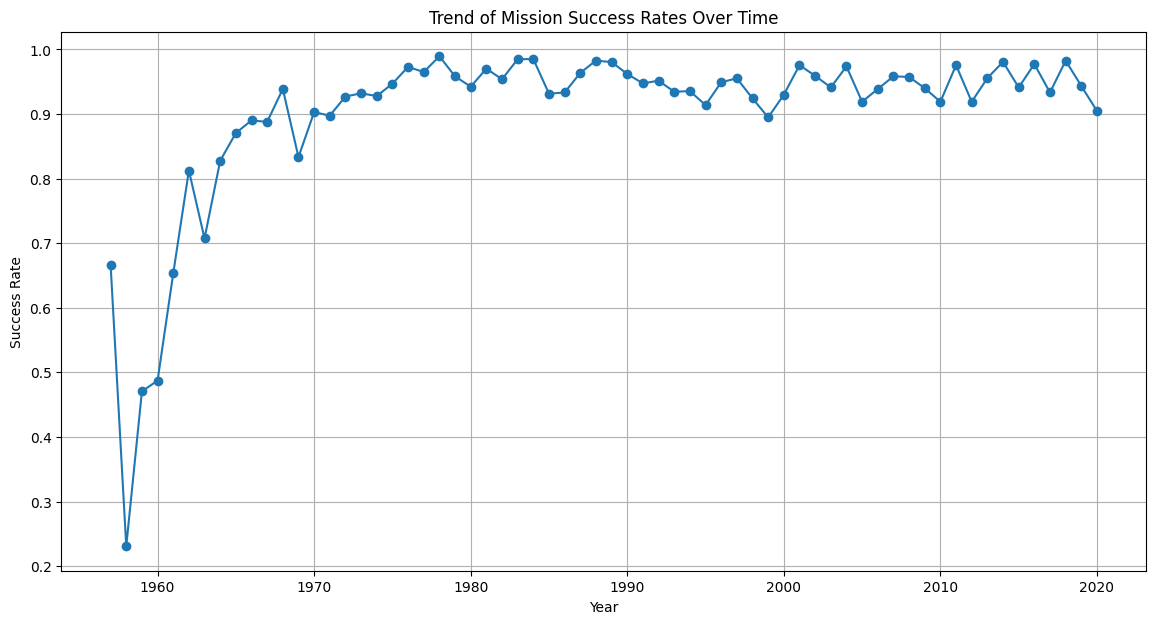

In [15]:
# Grouping by year and mission status to count the number of each status per year
missions_by_year_status = missions_df.groupby(['Year', 'Mission_Status']).size().unstack().fillna(0)

# Calculating the success rate for each year
missions_by_year_status['Success_Rate'] = missions_by_year_status['Success'] / (missions_by_year_status['Success'] + missions_by_year_status['Failure'])

# Visualizing the trend of mission success rates over time
plt.figure(figsize=(14, 7))
missions_by_year_status['Success_Rate'].plot(marker='o', linestyle='-')
plt.title('Trend of Mission Success Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.grid(True)
plt.show()


Filter countries with the most launches

In [16]:
# Extracting country from the 'Location' column
missions_df['Country'] = missions_df['Location'].str.split(',').str[-1].str.strip()

# Counting the number of launches for each country
country_launch_counts = missions_df['Country'].value_counts()

country_launch_counts


Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: Country, dtype: int64

Visualize top 10 countries with the most launches

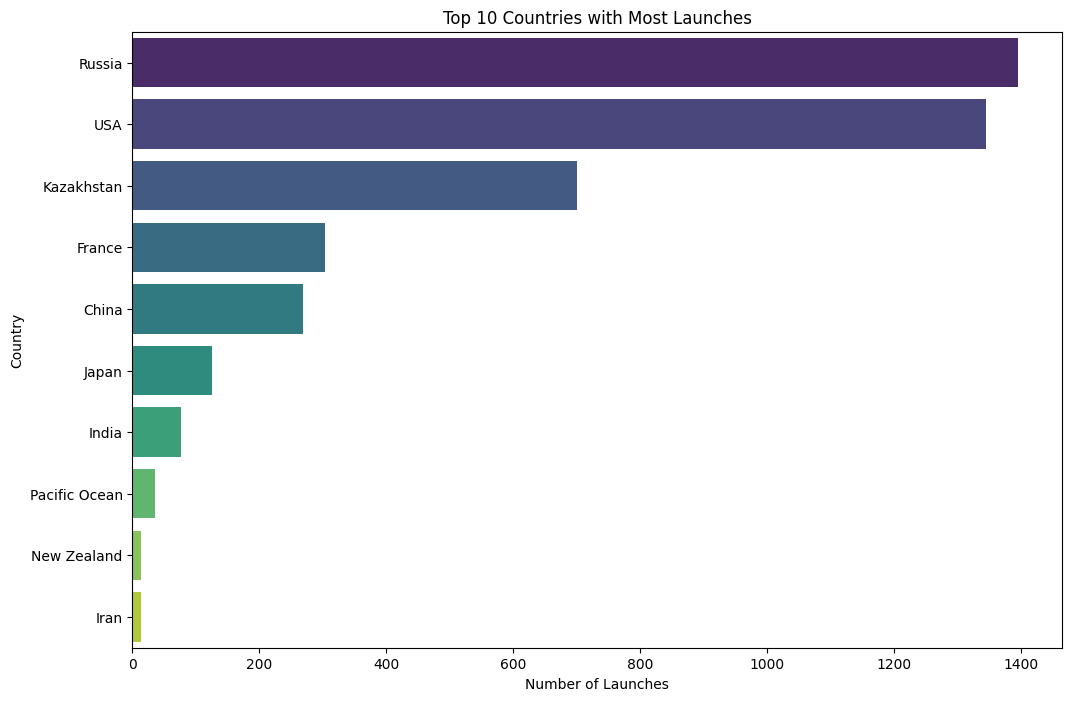

In [17]:
# Top 10 countries with the most launches
top_countries = country_launch_counts.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title('Top 10 Countries with Most Launches')
plt.xlabel('Number of Launches')
plt.ylabel('Country')
plt.show()

Get the number of launches for each launch side

In [18]:
# Counting the number of launches for each launch site
launch_sites = missions_df['Location'].value_counts()

# Displaying the top 10 launch sites based on activity
top_launch_sites = launch_sites.head(10)
top_launch_sites


Site 31/6, Baikonur Cosmodrome, Kazakhstan           235
Site 132/1, Plesetsk Cosmodrome, Russia              216
Site 43/4, Plesetsk Cosmodrome, Russia               202
Site 41/1, Plesetsk Cosmodrome, Russia               198
Site 1/5, Baikonur Cosmodrome, Kazakhstan            193
Site 132/2, Plesetsk Cosmodrome, Russia              174
Site 133/3, Plesetsk Cosmodrome, Russia              158
Site 43/3, Plesetsk Cosmodrome, Russia               138
LC-39A, Kennedy Space Center, Florida, USA           120
ELA-2, Guiana Space Centre, French Guiana, France    118
Name: Location, dtype: int64

Visualize top 10 launch sites bu number of launches

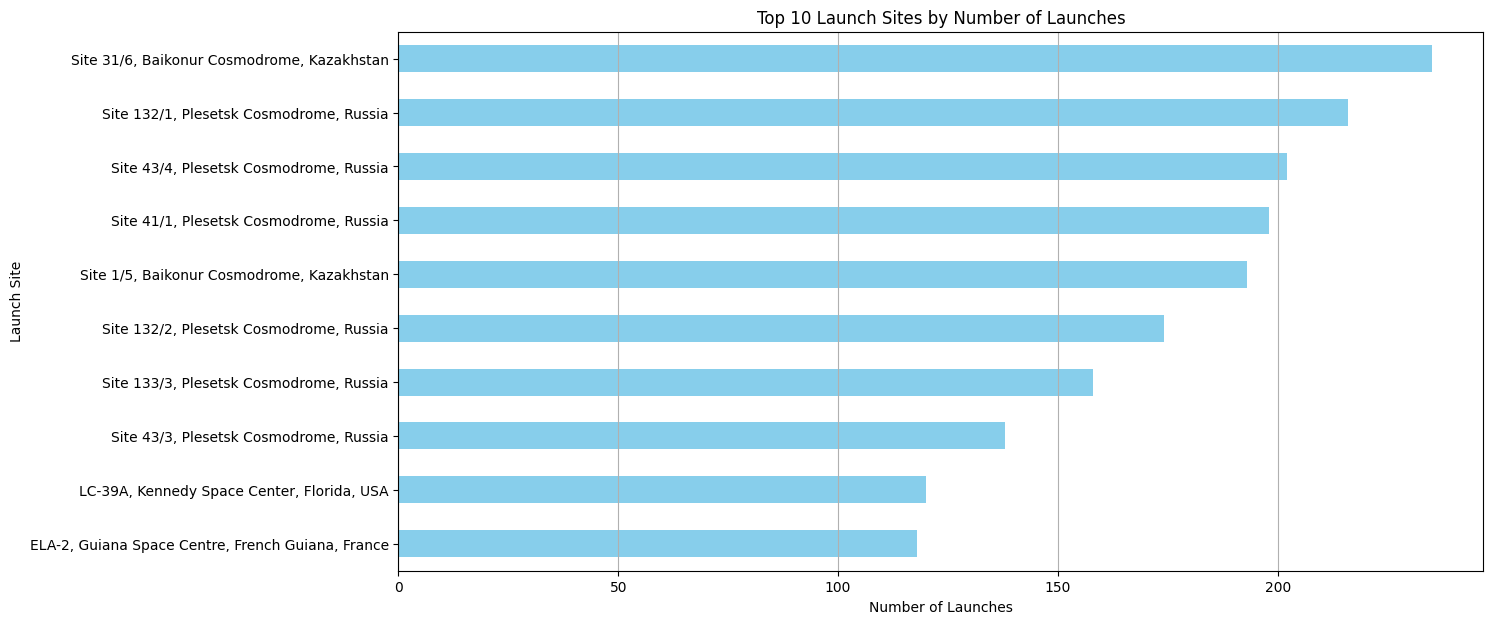

In [19]:
plt.figure(figsize=(14, 7))
top_launch_sites.plot(kind='barh', color='skyblue')
plt.title('Top 10 Launch Sites by Number of Launches')
plt.xlabel('Number of Launches')
plt.ylabel('Launch Site')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()
